# Proyek Analisis Data : E-Commerce Public Dataset

*  Nama : Muhammad Rizki Fadhilla
*  Email: mrizky12@gmail.com
*  Id Dicoding: mhdrzkfadh

## Menentukan pertanyaan bisnis

* Bagaimana performa penjualan tiap bulannya dari tahun 2016 sampai 2018
* kategori produk apa yang paling banyak terjual dan paling sedikit diminati?
* Transaksi tipe apa yang paling sering digunakan?
* Bagaimana demografi pelanggan yang kita miliki?

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data Wrangling

### Gathering Data

In [146]:
url = 'https://drive.google.com/file/d/1ihXd80axDffCTSlEgub8ZVCoILy-K5b6/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
customer_df = pd.read_csv(path)
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [147]:
url = 'https://drive.google.com/file/d/1stSFoyH8d6i33j_5S5-zzNPyNztZnvBr/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
order_items_df = pd.read_csv(path)
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [148]:
url = 'https://drive.google.com/file/d/1SACkdktsbbGfSvlkEH_p4X4hZ_QfFa0a/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
order_payments_df = pd.read_csv(path)
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [149]:
url = 'https://drive.google.com/file/d/1KHV4rExkVzIDNtSJ9jd1Gtis4PMsOeVi/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
order_reviews_df = pd.read_csv(path)
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [150]:
url = 'https://drive.google.com/file/d/1RAprYFa9UYupguRT9bW3w7hQ-BKU2hD-/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
orders_df = pd.read_csv(path)
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [151]:
url = 'https://drive.google.com/file/d/1END_QlLX5TiLZzMe28mj6p_CCOfWyYRH/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
pcnt_df = pd.read_csv(path)
pcnt_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [152]:
url = 'https://drive.google.com/file/d/1LKcuGuksYHWE_TL6hylPJTCClUVuX1gN/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
products_df = pd.read_csv(path)
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


menggabungkan data kedalam beberapa dataframe

In [153]:
# menggabungkan products_df dengan pcnt_df
products_df = pd.merge(left=products_df, right=pcnt_df, how="left",left_on="product_category_name", right_on="product_category_name" )

In [154]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [155]:
df_products = products_df[["product_id", "product_category_name", "product_category_name_english"]]

In [156]:
# menggabungkan order_items_df dengan df_product menjadi order_items_product_df
order_items_product_df = pd.merge(left=order_items_df, right=df_products, how="left",left_on="product_id", right_on="product_id")
order_items_product_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,garden_tools


In [157]:
# menggabungkan orders_df dengan customer_df menjadi customer_orders_df
customer_orders_df = pd.merge(left=orders_df, right=customer_df, how="left",left_on="customer_id", right_on="customer_id")
customer_orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [158]:
# menggabungkan customer_orders_df dengan order_payments_df
customer_orders_payment_df = pd.merge(left=customer_orders_df, right=order_payments_df, how="left",left_on="order_id", right_on="order_id")
customer_orders_payment_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,credit_card,3.0,179.12


### Assessing data

#### order_items_product_df

In [159]:
order_items_product_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_item_id                  112650 non-null  int64  
 2   product_id                     112650 non-null  object 
 3   seller_id                      112650 non-null  object 
 4   shipping_limit_date            112650 non-null  object 
 5   price                          112650 non-null  float64
 6   freight_value                  112650 non-null  float64
 7   product_category_name          111047 non-null  object 
 8   product_category_name_english  111023 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 8.6+ MB


adanya ketidaksesuaian tipe data pada kolom 'shipping_limit_date' yang seharusnya bertipe data datetime

In [160]:
print("Jumlah duplikasi: ", order_items_product_df.duplicated().sum())

Jumlah duplikasi:  0


In [161]:
order_items_product_df.isna().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name            1603
product_category_name_english    1627
dtype: int64

Adanya missing value pada kolom 'product_category_name' sebanyak 1603 dan kolom 'product_category_name_english' sebanyak 1627

In [162]:
order_items_product_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### customer_orders_payment_df

In [163]:
customer_orders_payment_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103887 entries, 0 to 103886
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       103887 non-null  object 
 1   customer_id                    103887 non-null  object 
 2   order_status                   103887 non-null  object 
 3   order_purchase_timestamp       103887 non-null  object 
 4   order_approved_at              103712 non-null  object 
 5   order_delivered_carrier_date   101999 non-null  object 
 6   order_delivered_customer_date  100755 non-null  object 
 7   order_estimated_delivery_date  103887 non-null  object 
 8   customer_unique_id             103887 non-null  object 
 9   customer_zip_code_prefix       103887 non-null  int64  
 10  customer_city                  103887 non-null  object 
 11  customer_state                 103887 non-null  object 
 12  payment_sequential            

In [164]:
print("Jumlah duplikasi: ", customer_orders_payment_df.duplicated().sum())

Jumlah duplikasi:  0


In [165]:
customer_orders_payment_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 175
order_delivered_carrier_date     1888
order_delivered_customer_date    3132
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
payment_sequential                  1
payment_type                        1
payment_installments                1
payment_value                       1
dtype: int64

In [166]:
customer_orders_payment_df.order_status.value_counts()

delivered      100757
shipped          1166
canceled          664
unavailable       649
invoiced          325
processing        319
created             5
approved            2
Name: order_status, dtype: int64

In [167]:
customer_orders_payment_df[customer_orders_payment_df.payment_value.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
32133,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,NaN,NaN,NaN,NaN


Adanya missing value sebanyak 175 entri pada kolom 'order_approved_at', 1888 entri pada kolom 'order_delivered_carrier_date' dan 3132 entri pada kolom 'order_delivered_customer_date' yang terjadi karena masalah order status seperti "shipped", "canceled", dll. Serta terdapat 1 missing value pada kolom 'payment_sequential', 'payment_type', 'payment_installments' dan 'payment_value'.

In [168]:
customer_orders_payment_df.describe()

,customer_zip_code_prefix,payment_sequential,payment_installments,payment_value
count,103887.000000,103886.000000,103886.000000,103886.000000
mean,35072.353490,1.092679,2.853349,154.100380
std,29743.416343,0.706584,2.687051,217.494064
min,1003.000000,1.000000,0.000000,0.000000
25%,11367.500000,1.000000,1.000000,56.790000
50%,24360.000000,1.000000,1.000000,100.000000
75%,58418.000000,1.000000,4.000000,171.837500
max,99990.000000,29.000000,24.000000,13664.080000


### Cleaning Data

#### order_items_product_df

In [169]:
# merubah tipe data menjadi datetime
order_items_product_df['shipping_limit_date'] = pd.to_datetime(order_items_product_df['shipping_limit_date'])
order_items_product_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   order_item_id                  112650 non-null  int64         
 2   product_id                     112650 non-null  object        
 3   seller_id                      112650 non-null  object        
 4   shipping_limit_date            112650 non-null  datetime64[ns]
 5   price                          112650 non-null  float64       
 6   freight_value                  112650 non-null  float64       
 7   product_category_name          111047 non-null  object        
 8   product_category_name_english  111023 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 8.6+ MB


In [170]:
values = order_items_product_df[order_items_product_df['product_category_name'].notnull() & order_items_product_df['product_category_name_english'].isnull()]

In [171]:
print(values)

                                order_id  order_item_id  \
3228    0745fd0c5e5bd55f752798a152b1d04b              1   
12976   1d7542bb5262913fe0516f7943b69a58              1   
12977   1d7542bb5262913fe0516f7943b69a58              2   
13025   1d911134e95ec6f299e80fe19b5b88c5              1   
18629   2ad4df0af7a71d632dccc0129bee3268              1   
19702   2d3bc1f6ed458a137c51adc3cab7a488              1   
31806   4821d5af4c2ac98b0f70e47c5d845520              1   
32887   4a8493d781a65dfb623103a5dedf44fa              1   
36976   53fa17c349c4b3dcbbadd8aad2eb559b              1   
37083   542dd8c7a80f7006b56c9cbb95e6433b              1   
45781   67f38c0b9d8a42541af92de7b6a19ea5              1   
56140   7faf8b9448b66f4a3ac98a312b3e7609              1   
56406   804e5ddab73def7d5e86b8ae6f27e83b              1   
62090   8dbdb81783a3c754dc9441826510a36a              1   
65191   94f94ebc2e26aeea2aa9e8945cb9fb0c              1   
72973   a653bb2e2418fd13d746e3639879aa83              1 

Karena terdapat perbedaan antara data pada kolom 'product_category_name' dan 'product_category_name_english' yang mana pada kolom 'product_category_name' memiliki nilai sedangkan kolom 'product_category_name_english' tidak, maka data pada kolom 'product_category_name' akan ditranslate untuk mengisi data yang kosong pada kolom 'product_category_name_english'

In [172]:
x1 = 'portateis_cozinha_e_preparadores_de_alimentos'
y1 = 'portable_kitchen_food_preparers'

x2 = 'pc_gamer'
y2 = 'pc_gaming'

condition1 = order_items_product_df['product_category_name'] == x1
order_items_product_df.loc[condition1, 'product_category_name_english'] = y1

condition2 = order_items_product_df['product_category_name'] == x2
order_items_product_df.loc[condition2, 'product_category_name_english'] = y2

In [173]:
order_items_product_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   order_item_id                  112650 non-null  int64         
 2   product_id                     112650 non-null  object        
 3   seller_id                      112650 non-null  object        
 4   shipping_limit_date            112650 non-null  datetime64[ns]
 5   price                          112650 non-null  float64       
 6   freight_value                  112650 non-null  float64       
 7   product_category_name          111047 non-null  object        
 8   product_category_name_english  111047 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 8.6+ MB


karena masih terdapat missing value pada kolom 'product_category_name' dan 'product_category_name_english' maka kolom masing masing akan diisi dengan 'undefined'

In [174]:
order_items_product_df.fillna(value='undefined', inplace=True)

In [175]:
order_items_product_df.isna().sum()

order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_category_name_english    0
dtype: int64

#### customer_orders_payment_df

In [176]:
# merubah tipe data menjadi datetime
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
    customer_orders_payment_df[column] = pd.to_datetime(customer_orders_payment_df[column])

In [177]:
customer_orders_payment_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103887 entries, 0 to 103886
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       103887 non-null  object        
 1   customer_id                    103887 non-null  object        
 2   order_status                   103887 non-null  object        
 3   order_purchase_timestamp       103887 non-null  datetime64[ns]
 4   order_approved_at              103712 non-null  datetime64[ns]
 5   order_delivered_carrier_date   101999 non-null  datetime64[ns]
 6   order_delivered_customer_date  100755 non-null  datetime64[ns]
 7   order_estimated_delivery_date  103887 non-null  datetime64[ns]
 8   customer_unique_id             103887 non-null  object        
 9   customer_zip_code_prefix       103887 non-null  int64         
 10  customer_city                  103887 non-null  object        
 11  

In [178]:
customer_orders_payment_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 175
order_delivered_carrier_date     1888
order_delivered_customer_date    3132
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
payment_sequential                  1
payment_type                        1
payment_installments                1
payment_value                       1
dtype: int64

In [179]:
columns = ["payment_sequential", "payment_type", "payment_installments", "payment_value"]
customer_orders_payment_df = customer_orders_payment_df.dropna(subset = columns)

In [180]:
customer_orders_payment_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 175
order_delivered_carrier_date     1888
order_delivered_customer_date    3132
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
dtype: int64

karena berdasarkan pertanyaan bisnis ini tidak akan menganalisis yang berhubungan dengan waktu ataupun ketepatan waktu pengiriman maka kolom 'order_approved_at', 'order_delivered_carrier_date' dan 'order_delivered_customer_date' akan dibiarkan saja, dan jika dihapus akan mempengaruhi data customer yang lainnya.

## Exploratory Data Analysis (EDA)

### Explorasi data customer_orders_payment_df

In [181]:
customer_orders_payment_df.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886,103886,103886,103711,101998,100754,103886,103886,103886.000000,103886,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,99440,8,98874,90732,81017,95663,458,96095,NaN,4119,27,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,9af2372a1e49340278e7c1ef8d749f34,delivered,2017-04-20 12:45:34,2017-04-22 09:10:13,2018-05-09 15:48:00,2017-06-22 16:04:46,2017-12-20 00:00:00,9a736b248f67d166d2fbb006bcb877c3,NaN,sao paulo,SP,NaN,credit_card,NaN,NaN
freq,29,29,100756,29,29,47,26,563,33,NaN,16221,43622,NaN,76795,NaN,NaN
first,NaN,NaN,NaN,2016-09-04 21:15:19,2016-10-04 09:43:32,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35072.550555,NaN,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29743.491677,NaN,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1003.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11366.250000,NaN,NaN,1.000000,NaN,1.000000,56.790000


berdasarkan rangkuman parameter statistik di atas, diperoleh jumlah pelanggan sebanyak 103886 orang

##### persebaran jumlah order setiap bulannya

menambahkan kolom bulan

In [182]:
customer_orders_payment_df['month'] = customer_orders_payment_df['order_purchase_timestamp'].dt.to_period("M")

In [183]:
customer_orders_payment_df.groupby(by="month").order_id.nunique()

month
2016-09       3
2016-10     324
2016-12       1
2017-01     800
2017-02    1780
2017-03    2682
2017-04    2404
2017-05    3700
2017-06    3245
2017-07    4026
2017-08    4331
2017-09    4285
2017-10    4631
2017-11    7544
2017-12    5673
2018-01    7269
2018-02    6728
2018-03    7211
2018-04    6939
2018-05    6873
2018-06    6167
2018-07    6292
2018-08    6512
2018-09      16
2018-10       4
Freq: M, Name: order_id, dtype: int64

##### persebaran jumlah pelanggan berdasarkan kota (city) dan negara bagian (state)

In [184]:
customer_orders_payment_df.groupby(by='customer_city').customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [185]:
customer_orders_payment_df.groupby(by='customer_state').customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41745
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

##### payment type

In [186]:
customer_orders_payment_df.groupby(by='payment_type').order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

### Explorasi data order_items_product_df

In [187]:
order_items_product_df.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000,112650,112650
unique,98666,NaN,32951,3095,93318,NaN,NaN,74,74
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN,cama_mesa_banho,bed_bath_table
freq,21,NaN,527,2033,21,NaN,NaN,11115,11115
first,NaN,NaN,NaN,NaN,2016-09-19 00:15:34,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2020-04-09 22:35:08,NaN,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320,NaN,NaN
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000,NaN,NaN
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000,NaN,NaN


berdasarkan rangkuman parameter statistik diatas, diperoleh kategori produk yang paling laris adalah bed_bath_table

### Eksplorasi Data all_df

In [188]:
all_df = pd.merge(
    left=order_items_product_df,
    right=customer_orders_payment_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,customer_id,...,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,month
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,cool_stuff,3ce436f183e68e07877b285a838db11a,...,2017-09-29,871766c5855e863f6eccc05f988b23cb,28013.0,campos dos goytacazes,RJ,1.0,credit_card,2.0,72.19,2017-09
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,...,2017-05-15,eb28e67c4c0b83846050ddfb8a35d051,15775.0,santa fe do sul,SP,1.0,credit_card,3.0,259.83,2017-04
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,furniture_decor,6489ae5e4333f3693df5ad4372dab6d3,...,2018-02-05,3818d81c6709e39d06b2738a8d3a2474,35661.0,para de minas,MG,1.0,credit_card,5.0,216.87,2018-01
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,perfumery,d4eb9395c8c0431ee92fce09860c5a06,...,2018-08-20,af861d436cfc08b2c2ddefd0ba074622,12952.0,atibaia,SP,1.0,credit_card,2.0,25.78,2018-08
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,garden_tools,58dbd0b2d70206bf40e62cd34e84d795,...,2017-03-17,64b576fb70d441e8f1b2d7d446e483c5,13226.0,varzea paulista,SP,1.0,credit_card,3.0,218.04,2017-02


In [189]:
all_df.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,customer_id,...,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,month
count,117604,117604.000000,117604,117604,117604,117604.000000,117604.000000,117604,117604,117601,...,117601,117601,117601.000000,117601,117601,117601.000000,117601,117601.000000,117601.000000,117601
unique,98666,NaN,32951,3095,93318,NaN,NaN,74,74,98665,...,449,95419,NaN,4110,27,NaN,4,NaN,NaN,24
top,895ab968e7bb0d5659d16cd74cd1650c,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,4a3ca9315b744ce9f8e9374361493884,2017-08-14 20:43:31,NaN,NaN,cama_mesa_banho,bed_bath_table,270c23a11d024a44c896d1894b261a83,...,2017-12-20 00:00:00,9a736b248f67d166d2fbb006bcb877c3,NaN,sao paulo,SP,NaN,credit_card,NaN,NaN,2017-11
freq,63,NaN,536,2133,63,NaN,NaN,11823,11823,63,...,649,75,NaN,18590,49566,NaN,86769,NaN,NaN,9016
first,NaN,NaN,NaN,NaN,2016-09-19 00:15:34,NaN,NaN,NaN,NaN,NaN,...,2016-10-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2020-04-09 22:35:08,NaN,NaN,NaN,NaN,NaN,...,2018-10-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.195920,NaN,NaN,NaN,120.822849,20.045551,NaN,NaN,NaN,...,NaN,NaN,35051.793097,NaN,NaN,1.093528,NaN,2.939482,172.686752,NaN
std,NaN,0.697721,NaN,NaN,NaN,184.477367,15.861351,NaN,NaN,NaN,...,NaN,NaN,29820.588877,NaN,NaN,0.726692,NaN,2.774223,267.592290,NaN
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000,NaN,NaN,NaN,...,NaN,NaN,1003.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000,NaN,NaN,NaN,...,NaN,NaN,11310.000000,NaN,NaN,1.000000,NaN,1.000000,60.870000,NaN


In [190]:
all_df.groupby(by="month").order_id.nunique()

month
2016-09       2
2016-10     308
2016-12       1
2017-01     789
2017-02    1733
2017-03    2641
2017-04    2391
2017-05    3660
2017-06    3217
2017-07    3969
2017-08    4293
2017-09    4243
2017-10    4568
2017-11    7451
2017-12    5624
2018-01    7220
2018-02    6694
2018-03    7188
2018-04    6934
2018-05    6853
2018-06    6160
2018-07    6273
2018-08    6452
2018-09       1
Freq: M, Name: order_id, dtype: int64

## Visualization & Explanatory Analysis

### Pertanyaan 1 : Bagaimana performa penjualan tiap bulannya dari tahun 2016 sampai 2018

In [191]:
grouping = all_df['order_purchase_timestamp'].dt.to_period("M")
monthly_order_df= all_df.groupby(grouping).order_id.nunique()

Text(0.5, 1.0, 'Number of Orders per Month')

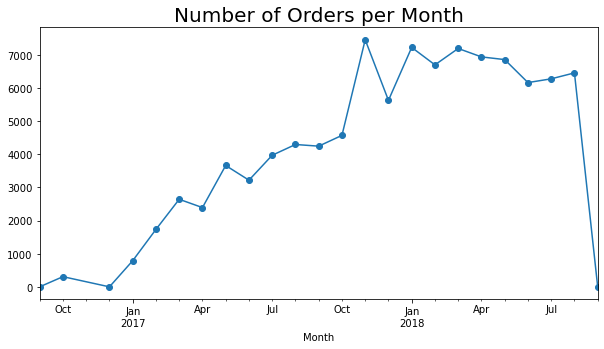

In [192]:
plt.figure(figsize=(10, 5))
monthly_order_df.plot(marker='o')
plt.xlabel('Month')
plt.title('Number of Orders per Month', loc="center", fontsize=20)

Berdasarkan visualisasi diatas, dapat diketahui bahwa jumlah penjualan mengalami peningkatan hampir setiap bulannya, peningkatan tertinggi terjadi pada bulan November 2017, sementara itu terjadi penurunan yang tajam pada bulan september 2018 karena hanya tercatat adanya 1 kali transaksi.

### Pertanyaan 2 : Kategori produk apa yang paling banyak terjual dan paling sedikit diminati?

In [193]:
categories_df = all_df.groupby("product_category_name_english")['product_id'].count().sort_values(ascending=False).reset_index()

In [194]:
categories_df.head(10)

,product_category_name_english,product_id
0,bed_bath_table,11823
1,health_beauty,9975
2,sports_leisure,8945
3,furniture_decor,8744
4,computers_accessories,8082
5,housewares,7355
6,watches_gifts,6201
7,telephony,4721
8,garden_tools,4574
9,auto,4379


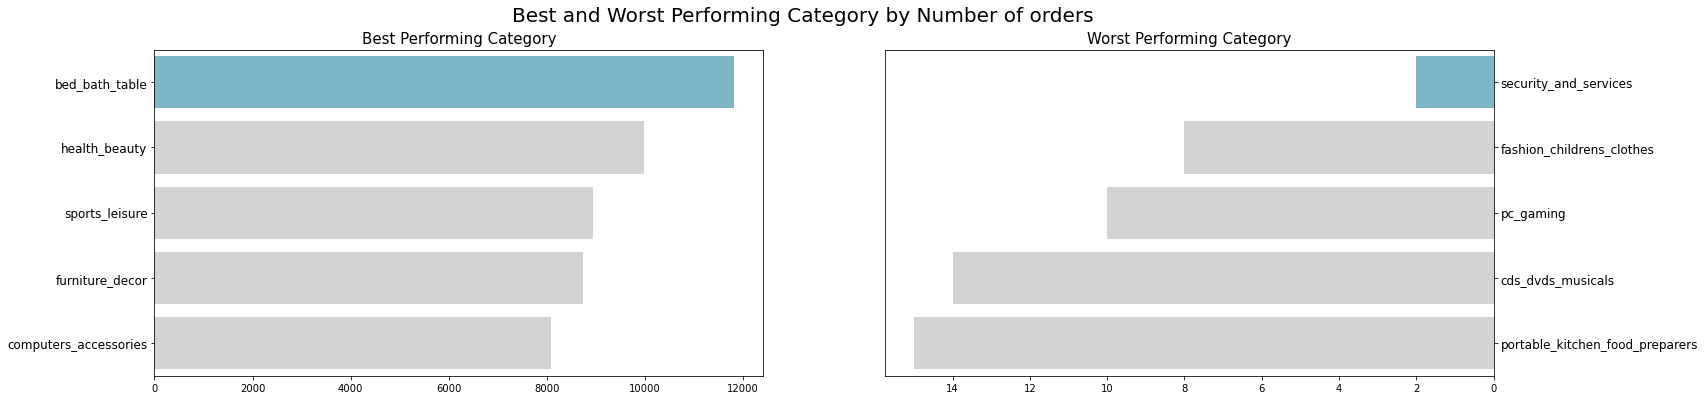

In [195]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
 
sns.barplot(x="product_id", y="product_category_name_english", data=categories_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Category", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)
 
sns.barplot(x="product_id", y="product_category_name_english", data=categories_df.sort_values(by="product_id", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Category", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
 
plt.suptitle("Best and Worst Performing Category by Number of orders", fontsize=20)
plt.show()

Berdasarkan visualisasi diatas, dapat diketahui bahwa kategori yang paling banyak ditransaksikan yaitu bed bath table, sementara security and service merupakan kategori yang paling sedikit ditransaksikan.

### Pertanyaan 3: Tipe transaksi apa yang paling sering digunakan?

Text(0.5, 1.0, 'Distribution of Payment Type')

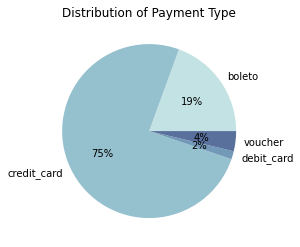

In [196]:
payment_df = all_df.groupby(by="payment_type")["order_id"].nunique().reset_index()
color = sns.color_palette("ch:start=.2,rot=-.3") 

plt.pie(payment_df["order_id"], labels=payment_df["payment_type"], colors=color, autopct='%.0f%%')
plt.title("Distribution of Payment Type")

Berdasarkan visualisasi diatas, dapat diketahui bahwa pelanggan yang kita miliki lebih cendrung menggunakan credit card dalam bertransaksi.

### Pertanyaan 4 : Bagaimana Demografi pelanggan yang kita miliki?

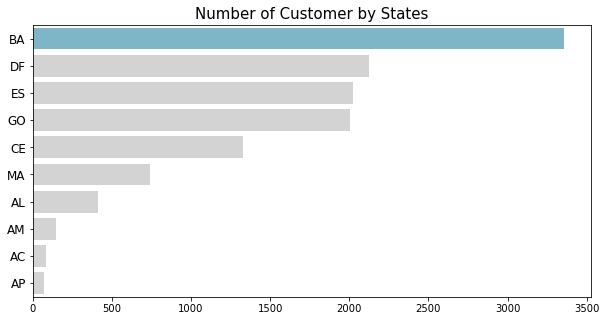

In [197]:
bystate_df = all_df.groupby(by="customer_state").customer_id.nunique().reset_index().head(10)
bystate_df.rename(columns={
    "customer_id": "customer_count",
    "customer_state": "state"
}, inplace=True)
bystate_df
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="customer_count", 
    y="state",
    data=bystate_df.sort_values(by="customer_count", ascending=False),
    palette=colors_
)
plt.title("Number of Customer by States", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

Berdasarkan visualisasi diatas, dapat diketahui bahwa pelanggan yang kita miliki paling banyak berasal dari negara bagian BA (Bahia).

## Conclusion

#### 1. Bagaimana performa penjualan tiap bulannya dari tahun 2016 sampai 2018?

>Jumlah penjualan mengalami peningkatan hampir setiap bulannya, peningkatan tertinggi terjadi pada bulan November 2017, sementara itu terjadi penurunan yang tajam pada bulan september 2018 karena hanya tercatat adanya 1 kali transaksi.

#### 2. Kategori produk apa yang paling banyak terjual dan paling sedikit diminati?

> kategori yang paling banyak terjual yaitu bed bath table, sementara security and service merupakan kategori yang paling sedikit diminati.

#### 3. Tipe transaksi apa yang paling sering digunakan?

> Sebesar 75% pelanggan menggunakan credit card dalam bertransaksi

#### 4. Bagaimana Demografi pelanggan yang kita miliki?

> Pelanggan yang kita miliki paling banyak berasal dari negara bagian BA (Bahia).

In [199]:
all_df.to_csv("all_data.csv", index=False)